In [30]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [32]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [43]:
BR_2015_2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN//massbal_to_nc/MASSBAL_BR_2015_2_fullyear.nc')
PI_2015_3_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN//massbal_to_nc/MASSBAL_PI_2015_3_fullyear.nc')
PI_ACBC_2015_2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN//massbal_to_nc/MASSBAL_PI_ACBC_2015_2_fullyear.nc')


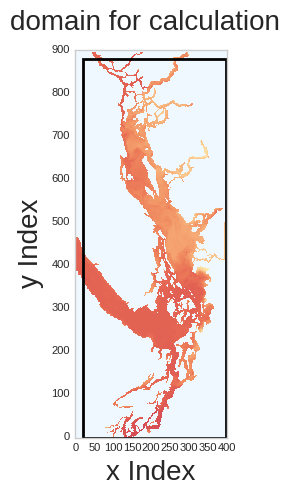

In [34]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [44]:

stor_mol_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol']
stor_mol_surf_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_deep']
stor_flx_PI_15_3 = PI_2015_3_nc['model_output']['stor_flx']
stor_trans_JDF_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JS']


stor_mol_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_BR_15_2 = BR_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JS']

stor_mol_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_ACBC_15_2 = PI_ACBC_2015_2_nc['model_output']['stor_trans_JS']

days_in = np.arange(0,np.size(stor_mol_PI_15_3),1)



In [45]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
t_mask = grid['tmask']


In [46]:
wdir_deep_0 = grid['e3t_0'][0,27:40,0,0]


## there are 3 lines here but they're on top of each other

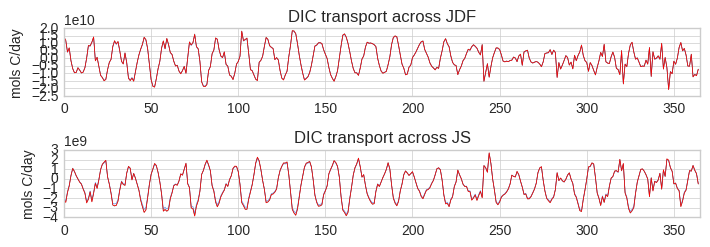

In [49]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))


ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_trans_JDF_PI_ACBC_15_2,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.5)
ax.plot(days_in,stor_trans_JDF_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.5)
ax.plot(days_in,stor_trans_JDF_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.5)
plt.xlim([0,365])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
ax.plot(days_in,stor_trans_JS_PI_ACBC_15_2,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.5)
ax.plot(days_in,stor_trans_JS_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.5)
ax.plot(days_in,stor_trans_JS_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.5)
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

In [52]:
stor_trans_JS_PI_15_3v = stor_trans_JS_PI_15_3[:]
stor_trans_JDF_PI_15_3v = stor_trans_JDF_PI_15_3[:]

stor_trans_JDF_BR_15_2v = stor_trans_JDF_BR_15_2[:]
stor_trans_JS_BR_15_2v = stor_trans_JS_BR_15_2[:]

stor_trans_JS_PI_ACBC_15_2v = stor_trans_JS_PI_ACBC_15_2[:]
stor_trans_JDF_PI_ACBC_15_2v = stor_trans_JDF_PI_ACBC_15_2[:]

In [51]:
posJS_PI15 = stor_trans_JS_PI_15_3v[stor_trans_JS_PI_15_3v>0]
negJS_PI15 = stor_trans_JS_PI_15_3v[stor_trans_JS_PI_15_3v<0]
posJDF_PI15 = stor_trans_JDF_PI_15_3v[stor_trans_JDF_PI_15_3v>0]
negJDF_PI15 = stor_trans_JDF_PI_15_3v[stor_trans_JDF_PI_15_3v<0]

posJS_BR15 = stor_trans_JS_BR_15_2v[stor_trans_JS_BR_15_2v>0]
negJS_BR15 = stor_trans_JS_BR_15_2v[stor_trans_JS_BR_15_2v<0]
posJDF_BR15 = stor_trans_JDF_BR_15_2v[stor_trans_JDF_BR_15_2v>0]
negJDF_BR15 = stor_trans_JDF_BR_15_2v[stor_trans_JDF_BR_15_2v<0]

posJS_PI_ACBC15 = stor_trans_JS_PI_ACBC_15_2v[stor_trans_JS_PI_ACBC_15_2v>0]
negJS_PI_ACBC15 = stor_trans_JS_PI_ACBC_15_2v[stor_trans_JS_PI_ACBC_15_2v<0]
posJDF_PI_ACBC15 = stor_trans_JDF_PI_ACBC_15_2v[stor_trans_JDF_PI_ACBC_15_2v>0]
negJDF_PI_ACBC15 = stor_trans_JDF_PI_ACBC_15_2v[stor_trans_JDF_PI_ACBC_15_2v<0]

[0 1 2 3 4]


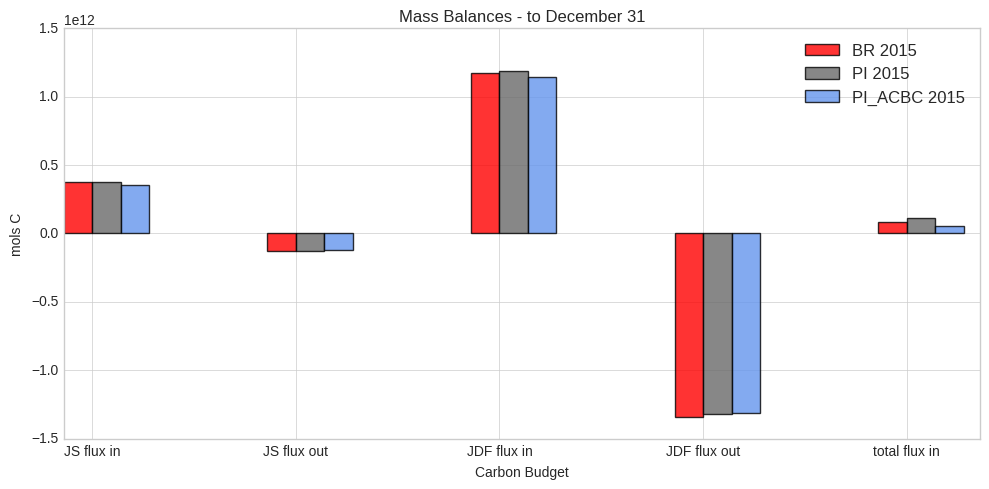

In [56]:
# data to plot
n_groups = 5
PI15_stats = (-np.sum(negJS_PI15), np.sum(-posJS_PI15), np.sum(posJDF_PI15), np.sum(negJDF_PI15),-np.sum(negJS_PI15)+ np.sum(-posJS_PI15)+ np.sum(posJDF_PI15)+ np.sum(negJDF_PI15) )
BR15_stats = (-np.sum(negJS_BR15), np.sum(-posJS_BR15), np.sum(posJDF_BR15), np.sum(negJDF_BR15),-np.sum(negJS_BR15)+ np.sum(-posJS_BR15)+ np.sum(posJDF_BR15)+ np.sum(negJDF_BR15))
PI_ACBC15_stats = (-np.sum(negJS_PI_ACBC15), np.sum(-posJS_PI_ACBC15), np.sum(posJDF_PI_ACBC15), np.sum(negJDF_PI_ACBC15),-np.sum(negJS_PI_ACBC15)+ np.sum(-posJS_PI_ACBC15)+ np.sum(posJDF_PI_ACBC15)+ np.sum(negJDF_PI_ACBC15) )

fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8
print(index)


rects3 = plt.bar(index, BR15_stats, bar_width,
alpha=opacity,
color='red',
label='BR 2015')

rects1 = plt.bar(index+bar_width*1, PI15_stats, bar_width,
alpha=opacity,
color='dimgrey',
label='PI 2015')

rects1 = plt.bar(index+bar_width*2, PI_ACBC15_stats, bar_width,
alpha=opacity,
color='cornflowerblue',
label='PI_ACBC 2015')



plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('JS flux in', 'JS flux out', 'JDF flux in', 'JDF flux out', 'total flux in'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

[0 1 2 3]


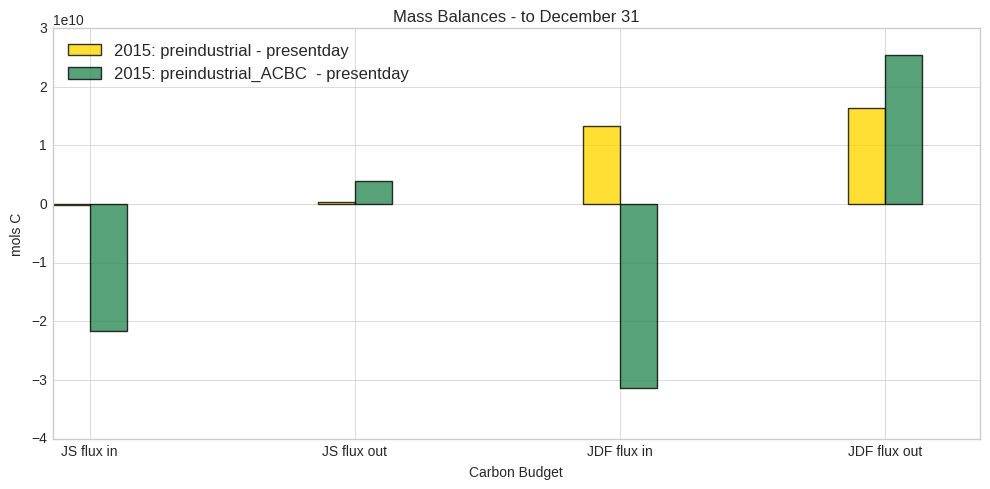

In [59]:
# data to plot
n_groups = 4
PI15_stats = (-np.sum(negJS_PI15)- (-np.sum(negJS_BR15)), np.sum(-posJS_PI15) - (np.sum(-posJS_BR15)), np.sum(posJDF_PI15) - np.sum(posJDF_BR15), np.sum(negJDF_PI15) - np.sum(negJDF_BR15))
PI_ACBC15_stats = (-np.sum(negJS_PI_ACBC15)- (-np.sum(negJS_BR15)), np.sum(-posJS_PI_ACBC15) - (np.sum(-posJS_BR15)), np.sum(posJDF_PI_ACBC15) - np.sum(posJDF_BR15), np.sum(negJDF_PI_ACBC15) - np.sum(negJDF_BR15))

fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8
print(index)

rects1 = plt.bar(index, PI15_stats, bar_width,
alpha=opacity,
color='gold',
label='2015: preindustrial - presentday')

rects2 = plt.bar(index+bar_width*1, PI_ACBC15_stats, bar_width,
alpha=opacity,
color='seagreen',
label='2015: preindustrial_ACBC  - presentday')


plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('JS flux in', 'JS flux out', 'JDF flux in', 'JDF flux out', 'total flux in'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()